<a href="https://colab.research.google.com/github/calzateu/Numerical_Analysis/blob/main/code/Sentiment_analysis/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import pandas as pd

In [203]:
data = pd.read_csv('Dataset-with-sentiments_f.csv')

In [204]:
sum(data['stop_comments'].isnull())

8

In [205]:
data = data[data['stop_comments'].notnull()]

In [206]:
sum(data['stop_comments'].isnull())

0

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [209]:
X_train.shape

(6507,)

In [210]:
X_test.shape

(1627,)

In [211]:
data['pol_cat'].value_counts()

0    4900
1    3234
Name: pol_cat, dtype: int64

## **Gonna Apply SVM**

In [212]:
from sklearn.feature_extraction.text import CountVectorizer

In [213]:
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
#vect = CountVectorizer()
#tf_train = vect.fit_transform(X_train)
#tf_test = vect.transform(X_test)

In [214]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = TfidfVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [215]:
tf_train

<6507x6746 sparse matrix of type '<class 'numpy.float64'>'
	with 44161 stored elements in Compressed Sparse Row format>

In [216]:
tf_train.toarray()[0].sum()

3.8864748009710217

In [217]:
#vect?

In [218]:
#vect.get_feature_names()

In [219]:
#X_train[0]

In [220]:
#for i in tf_train.toarray()[0]:
#  if (i != 0):
#    print(i)

In [221]:
tf_train.shape

(6507, 6746)

**Print the Vocabulary**

In [222]:
#print(vect.vocabulary_)

In [223]:
#vocab = vect.vocabulary_

In [224]:
import time
from sklearn import svm
from sklearn.metrics import classification_report

In [225]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(tf_train, y_train)

SVC(kernel='linear')

**Accuracy score on training dataset**

In [226]:
prediction_linear = classifier_linear.predict(tf_test)
# results
report = classification_report(y_test, prediction_linear, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])

positive:  {'precision': 0.8988391376451078, 'recall': 0.8312883435582822, 'f1-score': 0.8637450199203187, 'support': 652}
negative:  {'precision': 0.892578125, 'recall': 0.9374358974358974, 'f1-score': 0.9144572286143071, 'support': 975}


**Accuracy score on test dataset i.e got from the splitting**

In [227]:
 classifier_linear.score(tf_test, y_test)

0.8948985863552551

**Make predictions on the test dataset i.e. unseen data to the model**

In [228]:
expected = y_test
predicted = classifier_linear.predict(tf_test)

**plot confusion matrix for the test dataset**

In [229]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

In [230]:
pip install mlxtend

[[542 110]
 [ 61 914]]


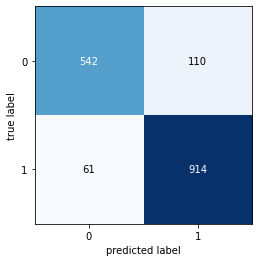

In [231]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [232]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       975
           1       0.90      0.83      0.86       652

    accuracy                           0.89      1627
   macro avg       0.90      0.88      0.89      1627
weighted avg       0.90      0.89      0.89      1627



**find the F1 score**

In [233]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.8891011242673129

# **Test the model with the comments of the other video**

In [234]:
data_test = pd.read_csv('Video_2/Dataset-with-sentiments.csv')

In [235]:
sum(data_test['stop_comments'].isnull())

1

In [236]:
data_test = data_test[data_test['stop_comments'].notnull()]

In [237]:
sum(data_test['stop_comments'].isnull())

0

In [238]:
data_test['pol_cat'].value_counts()

1    832
0    673
Name: pol_cat, dtype: int64

In [239]:
tf_test = vect.transform(data_test['stop_comments'])

In [240]:
tf_test

<1505x6746 sparse matrix of type '<class 'numpy.float64'>'
	with 12934 stored elements in Compressed Sparse Row format>

In [241]:
tf_test.toarray()[0].sum()

1.0

In [242]:
tf_train.toarray().shape

(6507, 6746)

In [243]:
tf_test.toarray().shape

(1505, 6746)

In [244]:
predicted = classifier_linear.predict(tf_test)

In [245]:
expected = data_test['pol_cat']

[[697 135]
 [ 49 624]]


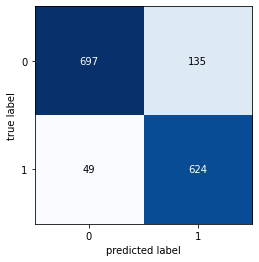

In [246]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [247]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       673
           1       0.93      0.84      0.88       832

    accuracy                           0.88      1505
   macro avg       0.88      0.88      0.88      1505
weighted avg       0.88      0.88      0.88      1505



In [248]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.8774525422888744

In [249]:
classifier_linear.score(tf_test, data_test['pol_cat'])

0.8777408637873754

# **Now we are going to study the impact of the video**

In [250]:
predicted

array([0, 0, 1, ..., 0, 0, 1])

In [251]:
likes = np.array(list(data_test['Likes']))
likes

array([1, 0, 3, ..., 0, 0, 3])

In [252]:
ponderacion = np.dot(predicted, likes)
ponderacion

358451

In [253]:
num_comentarios_pos = sum(predicted[predicted==1])
num_comentarios_pos

746

In [254]:
num_com_num_likes = sum(predicted[predicted==1])*sum(likes[predicted==1])
num_com_num_likes

267404446

In [255]:
num_com = len(predicted)
num_com

1505

In [257]:
num_likes = sum(likes)
num_likes

672310

In [258]:
(num_comentarios_pos + num_likes)/(num_com + num_likes)

0.9988735780592596